# Анализ компьютерных игр для интернет-магазина «Стримчик»


**Цель исследования:** Принятие решений о закупке и продвижении компьютерных игр на рынке. Это позволит провести рекламные кампании, которые привлекут покупателей и увеличат продажи в интернет-магазине "Стримчик".


**Ход исследования:**
1. Изучение общей информации о данных
2. Предобработка данных
3. Исследовательский анализ данных
- Анализ количества выпущенных игр по годам
- Изучение изменения продаж по платформам и выбор платформ с наибольшими суммарными продажами
- Построение распределения продаж по годам для выбранных платформ
- Определение актуального периода для анализа и прогнозирования продаж
- Анализ лидирующих платформ по продажам и их динамики
- Построение графика "ящик с усами" для глобальных продаж игр по платформам
- Изучение влияния отзывов пользователей и критиков на продажи на примере одной популярной платформы
- Оценка корреляции между отзывами и продажами
- Сравнение результатов с другими платформами
- Анализ распределения игр по жанрам и выявление наиболее прибыльных
4. Портрет пользователя каждого региона
- Определение самых популярных платформ и жанров в различных регионах
- Анализ влияния рейтинга ESRB на продажи в отдельном регионе
5. Проверка гипотез
- Сравнение средних пользовательских рейтингов платформ Xbox One и PC
- Сравнение средних пользовательских рейтингов жанров Action и Sports
6. Общий вывод


Для проведения анализа у нас есть следующие наборы данных:


**Описание данных**  `games.csv`
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from datetime import datetime
from scipy import stats as st
from scipy.stats import ttest_ind

## Шаг 1. Загрузка данных

### Открыть файл csv и сохранить их в датафреймы

In [2]:
data = pd.read_csv('/datasets/games.csv')

### Изучение общей информации о данных

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info() #Общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isna().sum().sort_values(ascending=False) #проверка пропусков 

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Таблицы советую сортировать) 

In [6]:
data.describe() #проверка значении в стобцах min max среднее 

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


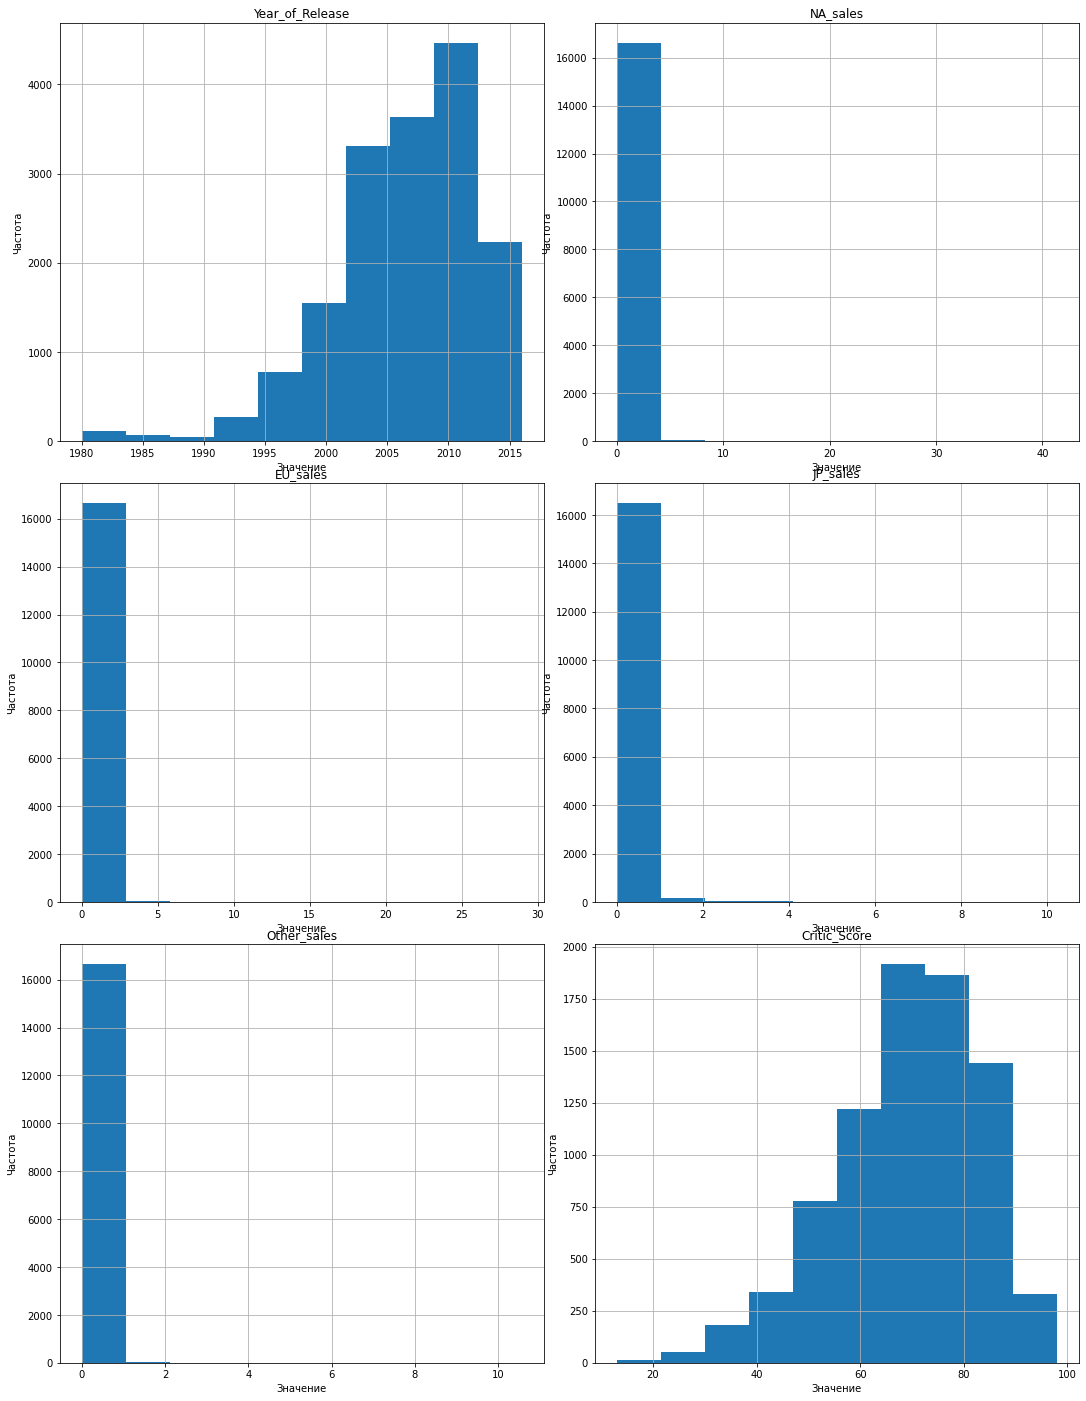

In [7]:
data.hist(figsize=(15, 20))
plt.tight_layout()  #расположение графиков на странице
plt.subplots_adjust(top=0.95)  # пространство над графиками
for ax in plt.gcf().get_axes():
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')

In [8]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [9]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [11]:
data.duplicated().sum()

0

**Общая информация:** 
* **Количество строк:** 16715
* **Количество столбцов:** 11
* **Минимальное и максимальное значения:** есть аномалии и выбросы в столбцах 
* **Наличие отрицательных значений:** аномалии нет
* **Есть пропущенные значение в столбцах, которые нужно обработать после анализа.**
* **Изменить формат столбцов** Year_of_Release из float64 на datetime 
* **Явных дубликатов нет**

## Шаг 2. Предобработка данных

### Анализ и обработка пропущенных значении

#### Замените названия столбцов (приведите к нижнему регистру)

In [12]:
data.columns = data.columns.str.lower()# Замена названий столбцов

#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [13]:
# Преобразование формат столбцов
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

#### Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [14]:
# Заполнение пропусков 
data['name'].fillna('Unknown', inplace=True)
data['genre'].fillna('Unknown', inplace=True)
data['rating'].fillna('Unknown', inplace=True)

In [15]:
# Подсчет суммарных продаж во всех регионах
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [16]:
# Промежуточный вывод обновленной инфы
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16715 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16715 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           16715 non-null  object        
 11  total_sales      16715 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.5+ MB


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
total_sales           0
dtype: int64

In [17]:
data[data['user_score'] == 'tbd']['user_score'].count()

0

#### Выводы
1. **Преобразование формата столбцов** year_of_release и user_score:
- Преобразование в формат datetime позволит работать с датами для фильтрации данных по году или вычисление временных интервалов
- Преобразование столбца 'user_core' в числовой формат позволит нам выполнять математические операции, вычислять статистику и проводить анализ данных, errors='coerce позволит избежать ошибки из-за аббревиатуры 'tbd' 
2. **Замена пропусков** 'name','genre' и 'rating'
- в столбце 'name' были 2 пропуска, без названия вся информация безполезна, я немного боюсь удалять(если в дальнейшем есть возможность восстановить) и заполнила значение на "Unknown"  
- 'genre' и 'rating' - заполнение значением 'Unknown' помогает сохранить информацию о пропущенных значениях и продолжить анализ данных без искажений 
3. **Предположительные причины пропусков:**
- Технические причины - Пропуски могли возникнуть из-за неполадок в системе записи данных
- Ручные ошибки - Ошибки при заполнении форм 
- Ошибки в процессе сбора данных - Проблем с доступом к определенной информации
4. **Остальные пропуски:** Для обработки пропусков в столбцах year_of_release, critic_score, user_score требуется тщательный анализ, показатели которых влияет на общую статистику и расчеты

## Шаг 3. Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Text(0, 0.5, 'Количество')

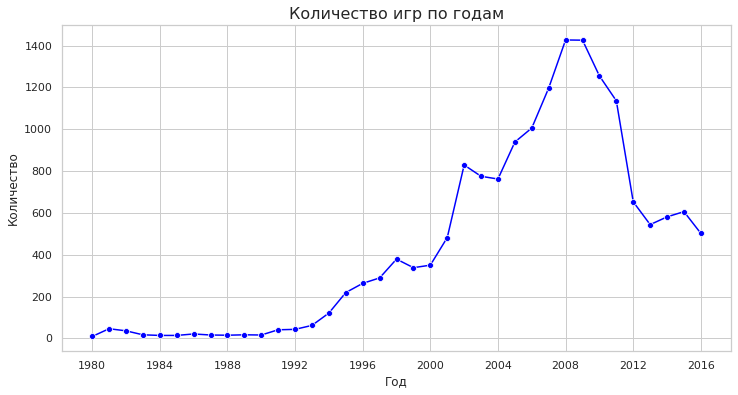

In [18]:
games_per_year = data['year_of_release'].value_counts().sort_index()


sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=games_per_year, marker='o', color='blue')

plt.title('Количество игр по годам', fontsize=16)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество', fontsize=12)

**Ответ на вопрос** Все зависеть от целей и задач исследования. Но, если анализ ограничен определенным временным периодом или конкретными вопросами, данные за более далекие годы могут быть менее значимыми

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

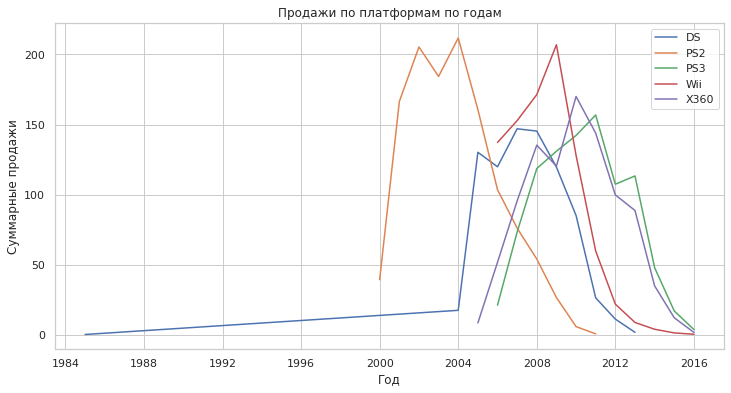

In [19]:
# Рассчет сумм от продаж
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# платформы с наибольшим суммарными продажами
top_platforms = platform_sales.head(5)

# Фильтрация данных для выбранных платформ
top_platforms_data = data[data['platform'].isin(top_platforms.index)]

# Распределение по годам
platform_sales_by_year = top_platforms_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Визуализация
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=platform_sales_by_year)
plt.title('Продажи по платформам по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.legend()

In [20]:
platform_sales.head(5)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

Топ платформы с наибольшими суммарными продажами:

- PS2 
- X360
- PS3
- Wii
- DS 

Жизненный цикл платформы составляет примерно от 4 до 10 лет. После этого периода платформы часто устаревают и заменяются новыми моделями или конкурирующими платформами.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [21]:
# Актуальный период
actual_period = data[data['year_of_release'].between(pd.to_datetime('2013'), pd.to_datetime('2016'))]
actual_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


**В результате проведенного исследования предыдущих вопросов были получены следующие выводы:**

1. Количество выпускаемых игр: Наблюдается рост количества выпускаемых игр с начала 2000-х годов до 2008 года. После этого происходит постепенное снижение. Основные данные после 2013 года, позволяют более точно прогнозировать продажи в ближайшем будущем

2. Продажи по платформам с наибольшими суммарными продажами: Это платформы PS2, Xbox360, PS3, Wii и DS. Они имеют активное присутствие на рынке в последние годы

3. Характерный срок появления и исчезновения платформ: развиваются в течение 5-10 лет
 
 
Актуальным периодом может быть период с 2013г - по 2016г. для построения прогноза на 2017г

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

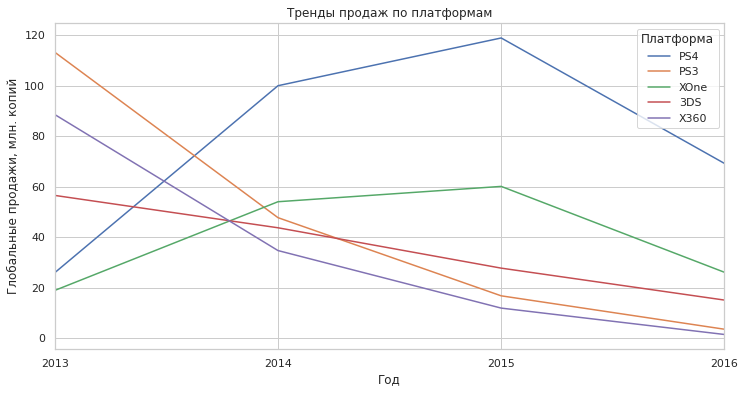

In [22]:
# Рассчет сумм продаж по платформам
platform_sales = actual_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Платформы с наибольшими суммарными продажами
top_platforms = platform_sales.head(5)

# Определение тренда для каждой платформы
platform_trends = actual_period.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Визуализация трендов по платформам
platform_trends[top_platforms.index].plot(figsize=(12, 6))
plt.title('Тренды продаж по платформам')
plt.xlabel('Год')
plt.ylabel('Глобальные продажи, млн. копий')
plt.legend(title='Платформа')

**Вывод:** Исходя из анализа графиков, можно сделать вывод, что некоторые платформы видеоигр в последние годы имеют тенденцию к снижению продаж, но все же остаются значимыми. Наиболее прибыльными платформами на текущий момент являются PS4 и Xbox One. Платформы PS3 и Xbox 360 уже устарели и имеют незначительные продажи. Платформа 3DS имеет некоторую активность, но её прибыльность не так высока, как у других платформ. Это свидетельствует о необходимости адаптации к рыночным трендам и выборе наиболее перспективных платформ для разработки и выпуска игр.

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

(0.0, 2.0)

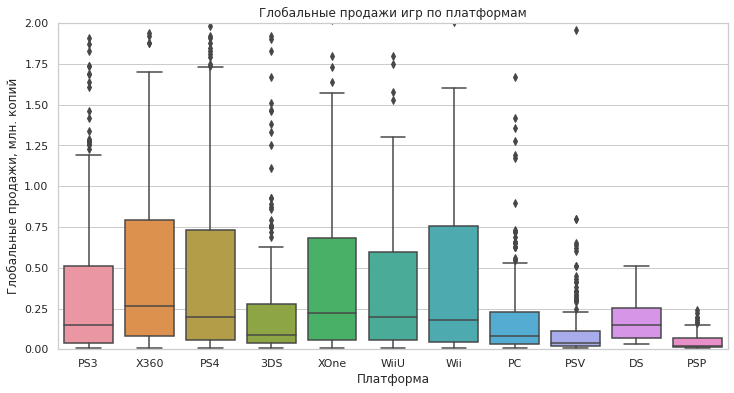

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=actual_period, x='platform', y='total_sales')
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи, млн. копий')
plt.ylim(0, 2)  # Указать диапазон значений для оси y

**Результат:** 

Наибольшие медианные продажи наблюдаются у платформы PS4, а также у Xbox One и Wii.
Усы у PS4 и Xbox One простираются дальше остальных платформ, что указывает на наличие выбросов - игр с очень высокими продажами.
Платформы 3DS и PSV имеют наименьшие медианные продажи и более узкий размах, что говорит о меньшей популярности 


### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы

Корреляция отзывов пользователей и продаж: -0.03


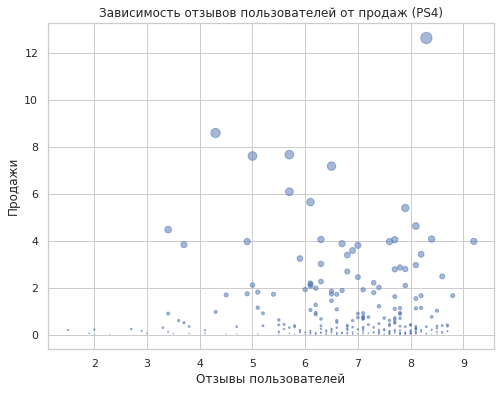

In [24]:
# Диаграмму рассеяния для отзывов пользователей
ps4_data = actual_period[actual_period['platform'] == 'PS4']

plt.figure(figsize=(8, 6))
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], s=ps4_data['total_sales']*10, alpha=0.5)
plt.title('Зависимость отзывов пользователей от продаж (PS4)')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')

user_correlation = ps4_data['user_score'].corr(ps4_data['total_sales'])
print('Корреляция отзывов пользователей и продаж: {:.2f}'.format(user_correlation))

Корреляция отзывов критиков и продаж: 0.41


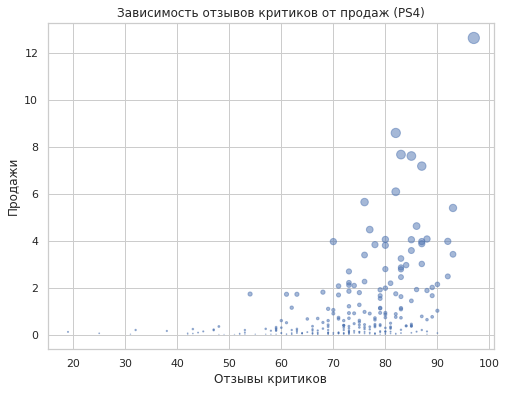

In [26]:
# Критики
plt.figure(figsize=(8, 6))
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], s=ps4_data['total_sales']*10, alpha=0.5)
plt.title('Зависимость отзывов критиков от продаж (PS4)')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')

# Корреляции между отзывами критиков и продажами
critic_correlation = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print('Корреляция отзывов критиков и продаж: {:.2f}'.format(critic_correlation))

Text(0, 0.5, 'Продажи')

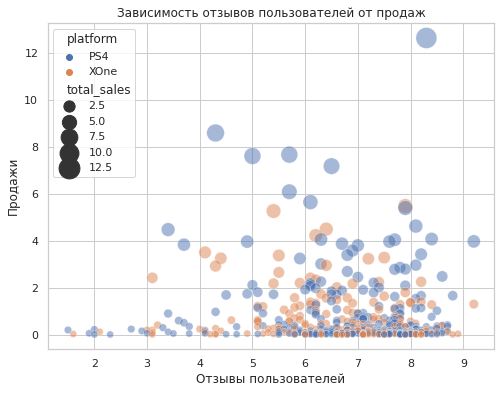

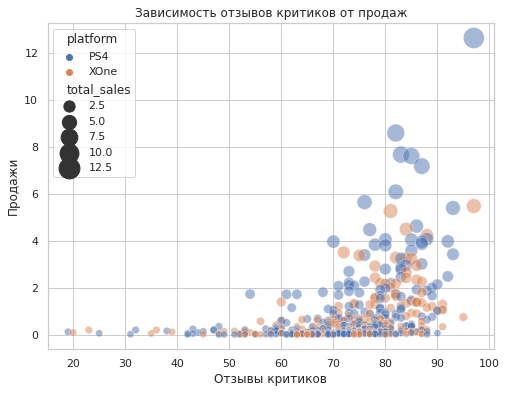

In [27]:
# Перспективные платформы
platforms = ['PS4', 'XOne', 'NS']
platforms_data = actual_period[actual_period['platform'].isin(platforms)]

# Зависимость отзывов пользователей от продаж
plt.figure(figsize=(8, 6))
sns.scatterplot(data=platforms_data, x='user_score', y='total_sales', hue='platform', size='total_sales', sizes=(50, 500), alpha=0.5)
plt.title('Зависимость отзывов пользователей от продаж')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')

# Зависимость отзывов критиков от продаж
plt.figure(figsize=(8, 6))
sns.scatterplot(data=platforms_data, x='critic_score', y='total_sales', hue='platform', size='total_sales', sizes=(50, 500), alpha=0.5)
plt.title('Зависимость отзывов критиков от продаж')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')

**Из диаграммы рассеяния и вычисленной корреляции можно сделать следующие выводы:**
Платформа PS4:

- Наблюдается положительная корреляция между отзывами пользователей и продажами игр для PS4.
- Умеренная положительная корреляция между отзывами критиков и продажами игр для PS4. Игры, получившие высокие оценки критиков, склонны высоким продажам.

Другие перспективные платформы ('PS4', 'XOne', 'NS'):

- Для других перспективных платформ также наблюдается положительная корреляция между отзывами пользователей и продажами игр.

В целом, оценки отзывов пользователей и критиков могут влиять на объем продаж игр, но степень этого влияния может различаться в зависимости от платформы.

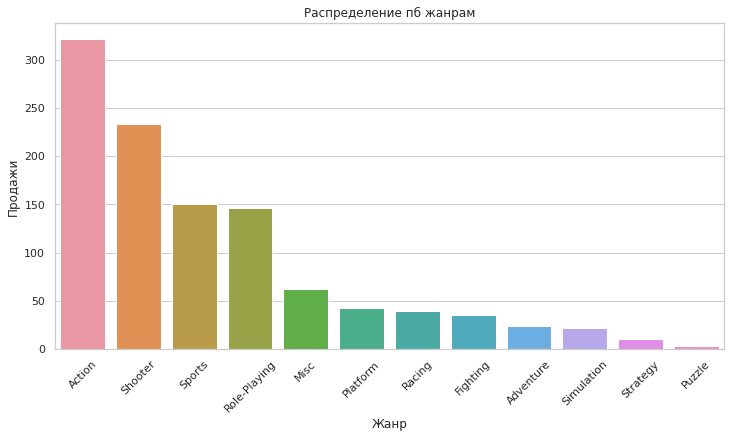

In [28]:
genre_sales = actual_period.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Распределение пб жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.xticks(rotation=45)

# Топ самых прибыльных жанров
top_genres = genre_sales.head(5)

**Выводы** Изучив эти данные, можно определить жанры, которые приносят наибольшую прибыль. 
Жанры с высокими продажами это - экшн, шутеры, спортивные и ролевые игры. 
Также можно выделить жанры с низкими продажами жто - стратегии, головоломки и приключенческие игры. 

Предположительно, игры с динамичным сюжетом, высокой графикой и высоким бюджетом более привлекательны для аудитории и могут успешно конкурировать на рынке. Однако, стоит учитывать, что каждый жанр имеет свою уникальность и специфику

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Shooter'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Platform'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Fighting'),
  Text(5, 0, 'Racing'),
  Text(6, 0, 'Action'),
  Text(7, 0, 'Simulation'),
  Text(8, 0, 'Misc'),
  Text(9, 0, 'Strategy'),
  Text(10, 0, 'Puzzle'),
  Text(11, 0, 'Adventure')])

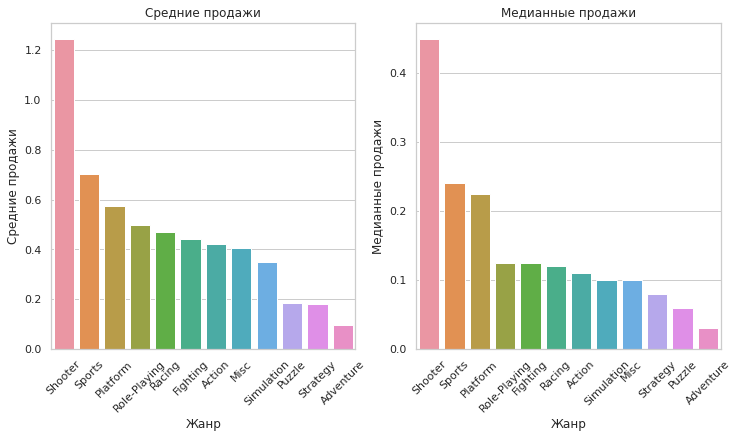

In [29]:
# Рассчитываем средние продажи по жанрам
genre_mean_sales = actual_period.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Рассчитываем медианные продажи по жанрам
genre_median_sales = actual_period.groupby('genre')['total_sales'].median().sort_values(ascending=False)

# Создаем графики для сравнения
plt.figure(figsize=(12, 6))

# Средние продажи
plt.subplot(1, 2, 1)
sns.barplot(x=genre_mean_sales.index, y=genre_mean_sales.values)
plt.title('Средние продажи')
plt.xlabel('Жанр')
plt.ylabel('Средние продажи')
plt.xticks(rotation=45)

# Медианные продажи
plt.subplot(1, 2, 2)
sns.barplot(x=genre_median_sales.index, y=genre_median_sales.values)
plt.title('Медианные продажи')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи')
plt.xticks(rotation=45)

## Шаг 4. Портрет пользователя каждого региона

In [30]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


### Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [31]:
def get_top_platforms(region):
    region_data = data[data['year_of_release'].between('2014', '2016')]
    top_platforms = region_data.groupby('platform')[region+'_sales'].sum().sort_values(ascending=False).head(5)
    platform_sales_share = (top_platforms / top_platforms.sum()) * 100
    return top_platforms, platform_sales_share

#NA
top_platforms_na, platform_sales_share_na = get_top_platforms('na')
print("Самые популярные платформы в регионе NA:")
print(top_platforms_na)
print("Доли продаж в регионе NA:")
print(platform_sales_share_na)
print()

#EU
top_platforms_eu, platform_sales_share_eu = get_top_platforms('eu')
print("Самые популярные платформы в регионе EU:")
print(top_platforms_eu)
print("Доли продаж в регионе EU:")
print(platform_sales_share_eu)
print()

#JP
top_platforms_jp, platform_sales_share_jp = get_top_platforms('jp')
print("Самые популярные платформы в регионе JP:")
print(top_platforms_jp)
print("Доли продаж в регионе JP:")
print(platform_sales_share_jp)

Самые популярные платформы в регионе NA:
platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64
Доли продаж в регионе NA:
platform
PS4     38.996322
XOne    32.139044
X360    11.191521
3DS      8.953217
PS3      8.719896
Name: na_sales, dtype: float64

Самые популярные платформы в регионе EU:
platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64
Доли продаж в регионе EU:
platform
PS4     55.120380
XOne    19.604103
PS3     10.825704
PC       7.616989
3DS      6.832825
Name: eu_sales, dtype: float64

Самые популярные платформы в регионе JP:
platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64
Доли продаж в регионе JP:
platform
3DS     47.915087
PS4     16.267735
PSV     15.747861
PS3     12.152063
WiiU     7.917253
Name: jp_sales, dtype: float64


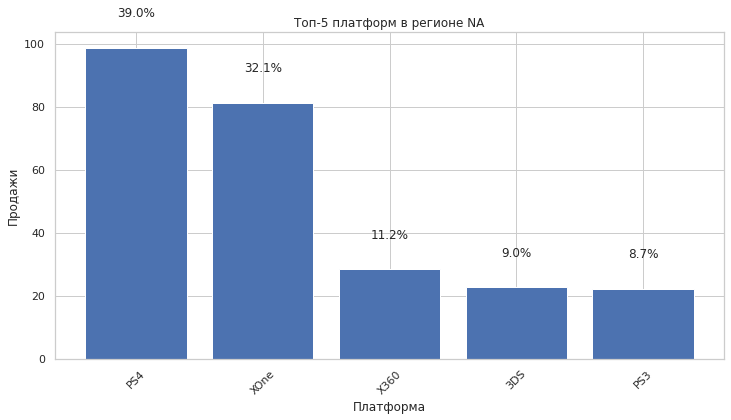

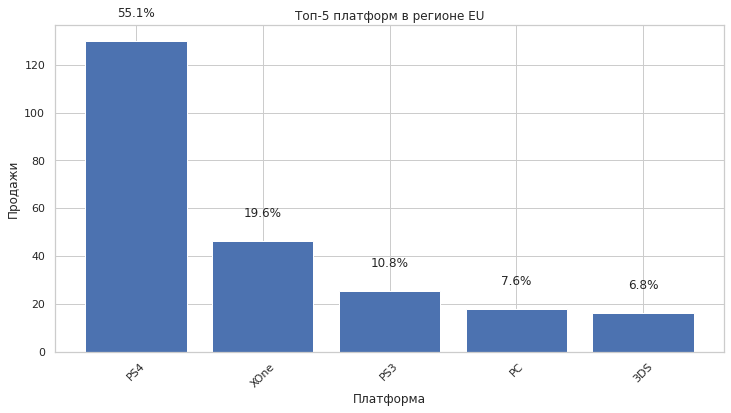

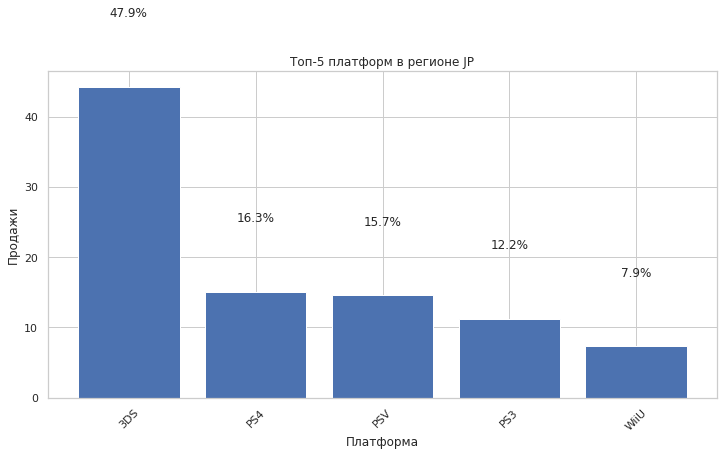

In [31]:
def plot_platform_sales(top_platforms, platform_sales_share, region):
    plt.figure(figsize=(12, 6))
    plt.bar(top_platforms.index, top_platforms.values)
    plt.title('Топ-5 платформ в регионе ' + region)
    plt.xlabel('Платформа')
    plt.ylabel('Продажи')
    plt.xticks(rotation=45)

    #доли продаж над столбцами
    for i, v in enumerate(platform_sales_share):
        plt.text(i, top_platforms[i] + 10, f'{v:.1f}%', ha='center')

    plt.show()

#NA
plot_platform_sales(top_platforms_na, platform_sales_share_na, 'NA')

#EU
plot_platform_sales(top_platforms_eu, platform_sales_share_eu, 'EU')

#JP
plot_platform_sales(top_platforms_jp, platform_sales_share_jp, 'JP')

#### Самые популярные жанры (топ-5). Поясните разницу.

In [32]:
def get_top_genres(region):
    region_data = data[data['year_of_release'].between('2014', '2016')]
    top_genres = region_data.groupby('genre')[region+'_sales'].sum().sort_values(ascending=False).head(5)
    genre_sales_share = (top_genres / top_genres.sum()) * 100
    return top_genres, genre_sales_share

#  NA
top_genres_na, genre_sales_share_na = get_top_genres('na')
print("Популярные жанры в NA:")
print(top_genres_na)
print("Доли продаж в NA:")
print(genre_sales_share_na)
print()

# Самые популярные жанры и доли продаж в регионе EU
top_genres_eu, genre_sales_share_eu = get_top_genres('eu')
print("Популярные жанры в EU:")
print(top_genres_eu)
print("Доли продаж в EU:")
print(genre_sales_share_eu)
print()

# Самые популярные жанры и доли продаж в регионе JP
top_genres_jp, genre_sales_share_jp = get_top_genres('jp')
print("Популярные жанры в JP:")
print(top_genres_jp)
print("Доли продаж в JP:")
print(genre_sales_share_jp)

Популярные жанры в NA:
genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64
Доли продаж в NA:
genre
Shooter         32.095857
Action          29.459789
Sports          18.736799
Role-Playing    13.594639
Misc             6.112916
Name: na_sales, dtype: float64

Популярные жанры в EU:
genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64
Доли продаж в EU:
genre
Action          32.721378
Shooter         28.707882
Sports          20.036805
Role-Playing    12.342812
Racing           6.191123
Name: eu_sales, dtype: float64

Популярные жанры в JP:
genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64
Доли продаж в JP:
genre
Role-Playing    40.159814
Action          38.123470
Fighting         8.209821
Misc            

Text(0, 0.5, 'Продажи в млн')

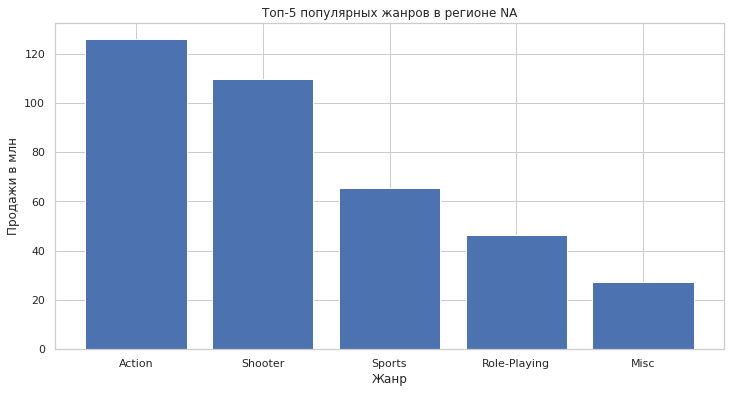

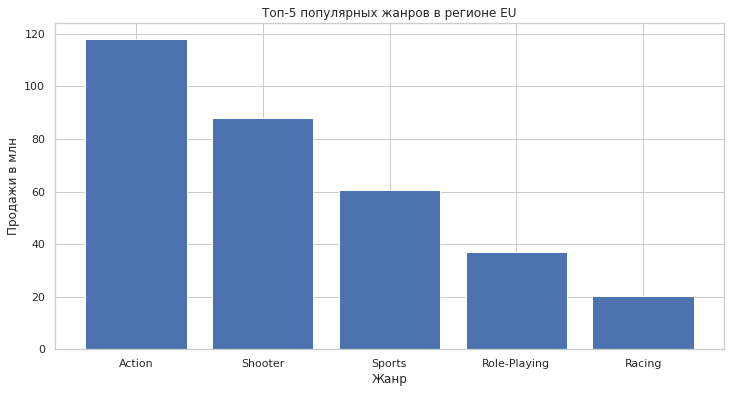

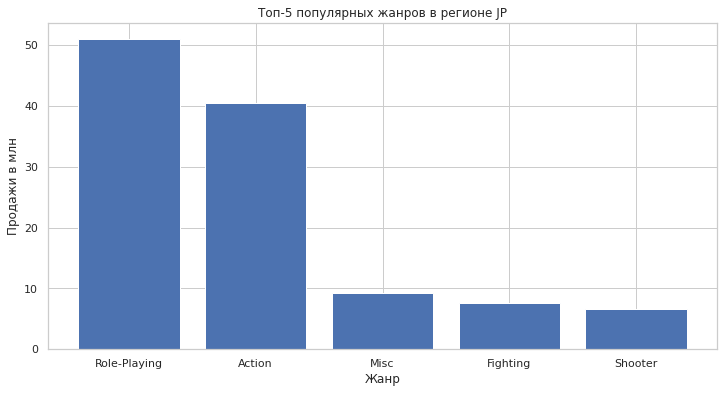

In [33]:
# Группировка и суммирование продаж по жанрам для каждого региона
genre_sales_na = actual_period.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
genre_sales_eu = actual_period.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
genre_sales_jp = actual_period.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)

# Визуализация топ-5 популярных жанров в регионе NA
plt.figure(figsize=(12, 6))
plt.bar(genre_sales_na.head(5).index, genre_sales_na.head(5)['na_sales'])
plt.title('Топ-5 популярных жанров в регионе NA')
plt.xlabel('Жанр')
plt.ylabel('Продажи в млн')


# Визуализация топ-5 популярных жанров в регионе EU
plt.figure(figsize=(12, 6))
plt.bar(genre_sales_eu.head(5).index, genre_sales_eu.head(5)['eu_sales'])
plt.title('Топ-5 популярных жанров в регионе EU')
plt.xlabel('Жанр')
plt.ylabel('Продажи в млн')


# Визуализация топ-5 популярных жанров в регионе JP
plt.figure(figsize=(12, 6))
plt.bar(genre_sales_jp.head(5).index, genre_sales_jp.head(5)['jp_sales'])
plt.title('Топ-5 популярных жанров в регионе JP')
plt.xlabel('Жанр')
plt.ylabel('Продажи в млн')

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [34]:
def get_region_profile(region):
#актулаьнвй периода для конкретного региона
    period_from, period_to = pd.to_datetime(['2014', '2016'])
    region_data = data[(data['year_of_release'] >= period_from) & (data['year_of_release'] <= period_to)]

        # По рейтингу ESRB
    rating_sales = region_data.groupby('rating')[[region+'_sales']].sum()
    rating_sales = rating_sales.sort_values(by=region+'_sales', ascending=False)
    

    print('\nПродажи игр по рейтингу ESRB', region)
    print(rating_sales)
    
    # Портрет пользователя для NA
get_region_profile('na')

# Портрет пользователя для EU
get_region_profile('eu')

# Портрет пользователя для JP
get_region_profile('jp')  


Продажи игр по рейтингу ESRB na
         na_sales
rating           
M           96.42
Unknown     64.72
E           50.74
T           38.95
E10+        33.23

Продажи игр по рейтингу ESRB eu
         eu_sales
rating           
M           93.44
Unknown     58.95
E           58.06
T           34.07
E10+        26.16

Продажи игр по рейтингу ESRB jp
         jp_sales
rating           
Unknown     56.90
T           14.78
E            8.94
M            8.01
E10+         4.46


**Выводы:**
- Самые популярные платформы в Америке и Европе в основном совпадают (PS4 и Xbox), в то время как в Японии популярны портативные платформы, такие как 3DS и PS4.
- Жанры Shooter, Action и Sports пользуются популярностью во всех регионах, но в Японии также выделяются жанры Role-Playing и Adventure.
- Рейтинг ESRB влияет на продажи игр в Северной Америке и Европе, где игры с рейтингом M имеют наибольшие продажи. В Японии рейтинг ESRB не так существенен, и многие игры имеют неизвестный рейтинг.
- Средние продажи по жанрам схожи в Северной Америке и Европе, но в Японии есть свои особенности с жанром Role-Playing, который пользуется большой популярностью.


## Шаг 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные.

Для проверки гипотезы использую двухсторонний t-тест

In [41]:
period_from, period_to = pd.to_datetime(['2014', '2016'])
# фильтрация 
actual_period = data[(data['year_of_release'] >= period_from) & (data['year_of_release'] <= period_to)]
#Выборка без пропущенных значений
xbox_one_ratings = actual_period[(actual_period['platform'] == 'XOne')]['user_score'].dropna()
pc_ratings = actual_period[(actual_period['platform'] == 'PC')]['user_score'].dropna()

alpha = 0.05  # Пороговое значение alpha

# Применение t-теста
results = stats.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False,alternative='two-sided')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу')
print('"Значение p-value:"', results.pvalue)

Отвергаем нулевую гипотезу
"Значение p-value:" 4.935072360183574e-06


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0(нулевая гипотеза) - Средние пользовательские рейтинги жанров Action и Sports одинаковые

H1(альтернативная гипотеза) - Средние пользовательские рейтинги жанров Action и Sports разные 

Для проверки гипотезы использую двухсторонний t-тест

In [39]:
period_from, period_to = pd.to_datetime(['2014', '2016'])
actual_period = data[(data['year_of_release'] >= period_from) & (data['year_of_release'] <= period_to)]

action_ratings = actual_period[(actual_period['genre'] == 'Action')]['user_score'].dropna()
sports_ratings = actual_period[(actual_period['genre'] == 'Sports')]['user_score'].dropna()

results = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

alpha = 0.05  

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу')

print('Значение p-value:', results.pvalue)

Отвергаем нулевую гипотезу
Значение p-value: 1.1825550382644557e-14


**Выводы:**
На основании проведенных гипотез можно сделать вывод, что оценки пользователей зависят от жанра игры, но не зависят от конкретной платформы 

## Шаг 6. Общий вывод

По результатам проведенного исследования, можно сделать следующие общие выводы:

**Тенденции в индустрии видеоигр:** Количество выпускаемых игр имел заметный рост с начала 2000-х до 2008 года, после чего произошло снижение. Однако, основные данные после 2014 года позволяют более точно прогнозировать продажи в ближайшем будущем.
Платформы PS2, Xbox 360, PS3, Wii и DS имеют наибольшие суммарные продажи, но некоторые из них устарели, их продажи снижаются. На текущий момент наиболее прибыльными являются PS4 и Xbox One.
Характерный срок появления и исчезновения платформ составляет примерно ~ 8 лет

**Влияние оценок и рейтингов:** Оценки пользователей оказывают влияние на продажи игр, особенно на платформах PS4, Xbox One. Высокие оценки пользователей способствуют увеличению продаж игр.
Оценки критиков также влияют на продажи игр, особенно на PS4 и других платформах. Игры с высокими оценками критиков имеют тенденцию к большим продажам.


На основе анализа исторических данных о продажах игр за 2016 год мы получили следующие результаты и выводы:

**Платформы:** Самыми прибыльными платформами являются PS4 и Xbox.

**Региональные различия:** Для успешности игр в разных регионах следует учитывать предпочтения пользователей. В Америке рекомендуется делать ставку на игры для платформы Xbox, в Европе - на PS4, а в Японии - на DS. 

**Жанры:** Для достижения успеха рекомендуется выбирать игры в жанрах Action, Shooters и Sports, Role-Playing и Adventure.

 **Проверка гипотез:** В результате проверки гипотез мы пришли к следующим выводам:

- Средние пользовательские рейтинги платформ Xbox One и PC не различаются.
- Средние пользовательские рейтинги жанров Action и Sports различаются.

Таким образом, на основе анализа данных мы можем сделать рекомендации и прогноз на 2017 год для разработчиков и издателей игр: фокусироваться на выпуске игр для платформ PS4 и Xbox, выбирать жанры Action, Shooters и Sports, учитывать региональные предпочтения и оценки критиков при разработке маркетинговых стратегий.